# Data Science Capstone Project

Student name: **Cynthia Pedrasa**  
Student pace: **self paced**  
Scheduled project review date/time:  **July 27, 2020 10:00-11:00am**  
Instructor name: **Jeff Herman**  
Blog post URL: https://cpedrasa.github.io/predicting_30-day_all_cause_readmission_from_hospital_discharge_summary

## Table of contents

Introduction: Data Science Framework  

**Part I**

I. <a href="#1.-Define-the-Problem">Define the Problem</a>  
  + A. <a href="#1a.-Import-the-Libraries">Import the Libraries</a>  
  + B. <a href="#1b.-Load-the-data">Load the data</a>  
  + C. <a href="#1c.-Inspect-the-Data">Inspect the Data</a>  
  + D. <a href="#1d.-Explore-the-Data">Explore the Data</a>  
  + E. <a href="#1e.-Load-the-Notes">Load the Notes</a> 
  + F. <a href="#1f.-Merge-the-Data">Merge the Data</a>  
  + G. <a href="#1g.-Create-the-Target-Variable">Create the Target Variable</a> 
  + H. <a href="#1h.-Save-the-Preprocessed-Data">Save the Preprocessed Data</a> 
 
 


# 1. Define the Problem  


## Problem: Predicting 30-Day All-Cause Readmission from Discharge Summary
Medical literature refers to Hospital Readmissions as “common, expensive and often preventable“ occurrences in acute-care medicine. Hospital readmission has been accepted as a quality of care outcome measure and provides a basis to compare hospital performance measures.  

Hospital Readmissions are both a Clinical and Financial Problem!
* CMS began penalizing hospitals for 30-day readmissions Oct. 1, 2012 at 1 percent, upping the penalty rate to 2 percent for fiscal year 2014
* CMS will cut payments to the penalized hospitals by as much as 3 percent for each Medicare case during fiscal 2020, which runs Oct. 1 through September 2020
* All-cause readmissions - The average cost of a readmission for any given cause is 11,200 USD, with a 21.2 percent readmission rate 

Currently, clinical data use is limited to the structured information. Dashboards are limited to reporting discrete data elements and coded information. However, it was reported that more than 80 percent of a healthcare organization's data is unstructured, including physician notes, clinical assessments, registration forms, discharge summaries and other nonstandardized electronic forms, which makes data collection and analysis difficult using standard methods. Insights we could get from the doctors notes that are free text in nature and if we are able to identify risk factors from the sea of data, we might be able to supplement prediction of readmission risk and improve outcomes for the patients.  

A strategy to reduce hospital readmission is to utilize risk stratification to better target patient engagement. In this project, we aim to utilize unstructured discharge summary data to predict the risk of hospital readmission. 



# 1a. Import the Libraries 

In [1]:
import pandas as pd
from pandas import set_option

import numpy as np
from numpy import mean , std, array
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt # plotting library for Python
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

import sqlite3  
from pandas import read_sql_query
import pyodbc
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

import os
import sys
from glob import glob

import time
from IPython import display
import warnings
warnings.filterwarnings('ignore')
import pickle
import scipy as sp

from pandas import set_option
from pandas.plotting import scatter_matrix

from collections import Counter

def exec_time():                        # record execution time
    execution_time = time.time() - start
    print('Execution time', time.strftime("%H:%M:%S", time.gmtime(execution_time)))


[<a href="#Data-Science-Capstone-Project">Jump back to Table of Contents</a>]  

# 1b. Load the data 

We will utilize the **MIMIC-III** (Medical Information Mart for Intensive Care III), a free hospital database. Mimic III is a relational database that contains de-identified data from over 40,000 patients who were admitted to **Beth Israel Deaconess Medical Center** in Boston, Massachusetts from 2001 to 2012. In order to get access to the data for this project, you will need to request access at this link (https://mimic.physionet.org/gettingstarted/access/) and complete the required training course at CITI “Data or Specimens Only Research

1. Register for the required training course:  https://www.citiprogram.org/index.cfm?pageID=154&icat=0&ac=0  
2. Completion Certification Link: https://www.citiprogram.org/verify/?wd9a98f28-052e-4af5-8e56-c4a37194fc4c-31496438 
3. Request access to the Mimic Database:  https://mimic.physionet.org/gettingstarted/overview/    
4. Overview of the mimic database:  https://mimic.physionet.org/mimictables/     
5. Database Schema: https://mit-lcp.github.io/mimic-schema-spy/  

Download the full MIMIC-III dataset from: https://physionet.org/content/mimiciii/1.4/  
https://github.com/MIT-LCP/mimic-code/blob/master/tutorials/sql-intro.md  
**26** Files:  Total uncompressed size: **6.2 GB**


## All dates in the database have been shifted (randomly distributed in the future) to protect patient confidentiality.  
Date shifting preserved the time of day, day of the week, and seasonality.


# Generate a SQLite database file from the MIMIC-III files

In [2]:

start = time.time()

DATABASE_NAME = "mimic3.db"
THRESHOLD_SIZE = 5 * 10 ** 7
CHUNKSIZE = 10 ** 6
CONNECTION_STRING = "sqlite:///{}".format(DATABASE_NAME)

if os.path.exists(DATABASE_NAME):
    msg = "File {} already exists.".format(DATABASE_NAME)
    print(msg)
    sys.exit()

for f in glob("*.csv"):
    print("Starting processing {}".format(f))
    if os.path.getsize(f) < THRESHOLD_SIZE:
        df = pd.read_csv(f, index_col="ROW_ID")
        df.to_sql(f.strip(".csv").lower(), CONNECTION_STRING)
    else:
        # If the file is too large, let's do the work in chunks
        for chunk in pd.read_csv(f, index_col="ROW_ID", chunksize=CHUNKSIZE):
            chunk.to_sql(
                f.strip(".csv").lower(), CONNECTION_STRING, if_exists="append"
            )
    print("Finished processing {}".format(f))

print("Should be all done!")

exec_time()

Starting processing PROCEDUREEVENTS_MV.csv
Finished processing PROCEDUREEVENTS_MV.csv
Starting processing CALLOUT.csv
Finished processing CALLOUT.csv
Starting processing D_CPT.csv
Finished processing D_CPT.csv
Starting processing D_ITEMS.csv
Finished processing D_ITEMS.csv
Starting processing CAREGIVERS.csv
Finished processing CAREGIVERS.csv
Starting processing MICROBIOLOGYEVENTS.csv
Finished processing MICROBIOLOGYEVENTS.csv
Starting processing LABEVENTS.csv
Finished processing LABEVENTS.csv
Starting processing INPUTEVENTS_CV.csv
Finished processing INPUTEVENTS_CV.csv
Starting processing ADMISSIONS.csv
Finished processing ADMISSIONS.csv
Starting processing D_LABITEMS.csv
Finished processing D_LABITEMS.csv
Starting processing DATETIMEEVENTS.csv
Finished processing DATETIMEEVENTS.csv
Starting processing PRESCRIPTIONS.csv
Finished processing PRESCRIPTIONS.csv
Starting processing PROCEDURES_ICD.csv
Finished processing PROCEDURES_ICD.csv
Starting processing NOTEEVENTS.csv
Finished processi

In [2]:
conn = sqlite3.connect('mimic3.db')         # Create the sqlite3 connection to the mimic database                          
cur = conn.cursor()                         # Create the cursor to fetch data from the database                                       


### Get the Admissions table

In [3]:
#Load the ADMISSIONS table i.e. information regarding a patient’s admission to the hospital.

df_adm = pd.read_sql_query("""SELECT * FROM ADMISSIONS;""", conn)
df_adm.info()


DatabaseError: Execution failed on sql 'SELECT * FROM ADMISSIONS;': no such table: ADMISSIONS

[<a href="#Data-Science-Capstone-Project">Jump back to Table of Contents</a>]  

# 1c. Inspect the Data 

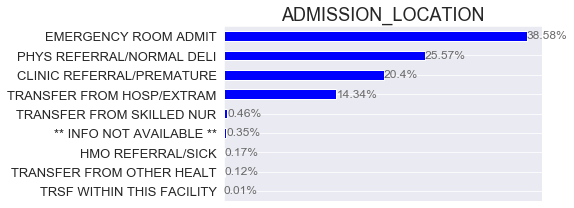

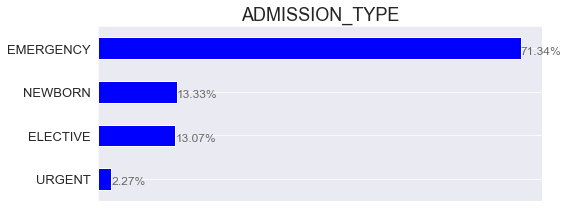

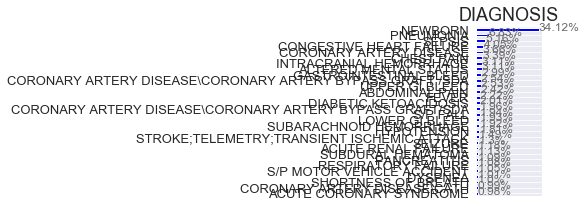

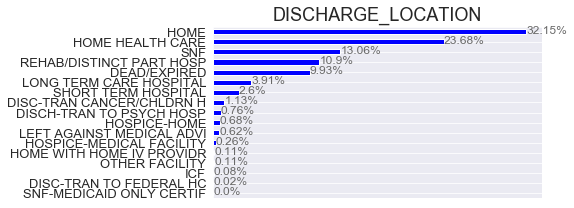

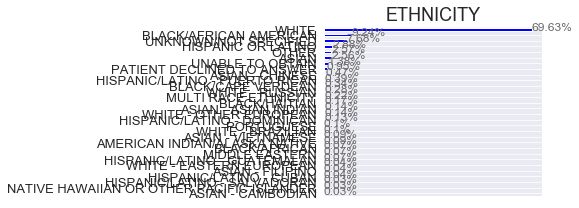

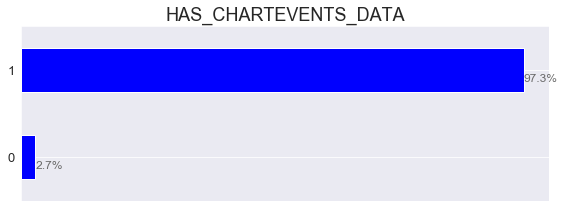

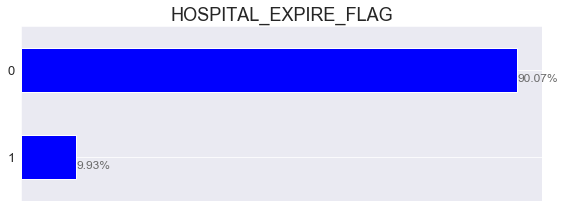

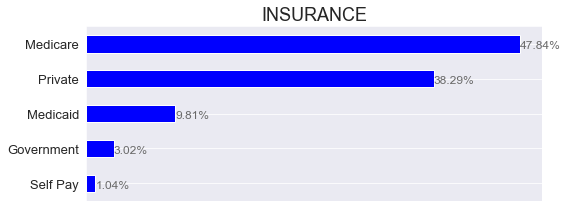

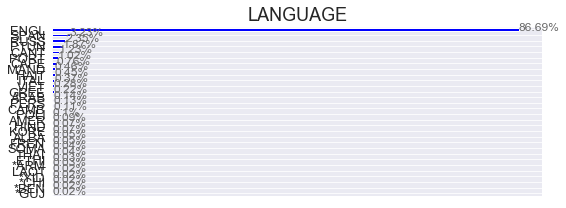

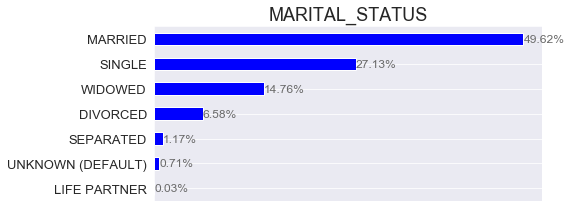

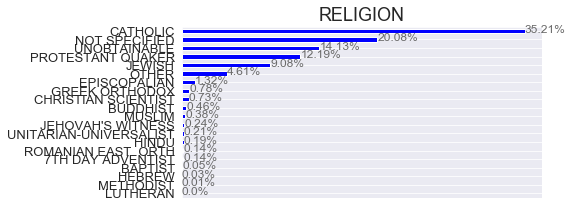

In [10]:
#Inspect value counts for each attribute (source code: https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html)
for col in df_adm[df_adm.columns.difference(['ROW_ID','SUBJECT_ID', 'HADM_ID','ADMITTIME', 'DISCHTIME',
       'DEATHTIME','EDREGTIME', 'EDOUTTIME' ])]:

    ax = df_adm[col].value_counts().head(30).plot(kind='barh', figsize=(8,3),
                                            color="blue", fontsize=13);
    ax.set_alpha(0.8)
    ax.set_title(col, fontsize=18)
    #ax.set_xlabel("%s: %f " % ([col]),fontsize=18);
   
    ax.set_xticks([])

    # create a list to collect the plt.patches data
    totals = []

    # find the values and append to list
    for i in ax.patches:
        totals.append(i.get_width())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+.3, i.get_y()+.38, \
                str(round((i.get_width()/total)*100, 2))+'%', fontsize=12,
    color='dimgrey')

    # invert for largest on top 
    ax.invert_yaxis()
    plt.tight_layout()
    plt.show();
    

Most patients were admitted from the emergency room or referred by physicians.  
A large proportion of the encounters were labor & delivery followed by Pneumonia as the principal diagnosis for the admission.  
Most patients were being discharged to home.  
Almost half of the admisssions were Medicare beneficiaries.  



In [11]:
#Inspect the discharge location attribute
df_adm.ADMISSION_TYPE.value_counts(ascending=False)

EMERGENCY    42071
NEWBORN       7863
ELECTIVE      7706
URGENT        1336
Name: ADMISSION_TYPE, dtype: int64

In [12]:
#Let's check patients with multiple admissions
df_admx = df_adm[df_adm.groupby('SUBJECT_ID')['SUBJECT_ID'].transform('size') > 2]
df_admx.SUBJECT_ID.value_counts()

13033    42
109      34
11861    34
5060     31
20643    24
         ..
27414     3
27163     3
18967     3
96218     3
14313     3
Name: SUBJECT_ID, Length: 2377, dtype: int64

In [13]:
# Let's create new columns, "next admission date and next admission type" to determine encounters with readmissions
q_adm = """SELECT  *
            ,LAG([ADMITTIME] ,-1) OVER(PARTITION BY SUBJECT_ID ORDER BY SUBJECT_ID)  AS NEXT_ADM_DATE
            ,LAG([ADMISSION_TYPE] ,-1) OVER(PARTITION BY SUBJECT_ID ORDER BY SUBJECT_ID) AS NEXT_ADM_TYP
            FROM df_adm
            GROUP BY SUBJECT_ID, ADMITTIME
            ORDER BY SUBJECT_ID,  ADMITTIME;"""
df_adm = pysqldf(q_adm)
print(df_adm.shape)
df_adm.loc[df_adm.SUBJECT_ID == 6901,['SUBJECT_ID','ADMITTIME','ADMISSION_TYPE','NEXT_ADM_DATE','NEXT_ADM_TYP']]

(58976, 21)


,SUBJECT_ID,ADMITTIME,ADMISSION_TYPE,NEXT_ADM_DATE,NEXT_ADM_TYP
8393,6901,2131-10-18 07:15:00,ELECTIVE,2132-01-15 07:15:00,ELECTIVE
8394,6901,2132-01-15 07:15:00,ELECTIVE,2133-03-14 00:58:00,EMERGENCY
8395,6901,2133-03-14 00:58:00,EMERGENCY,2133-08-27 12:00:00,ELECTIVE
8396,6901,2133-08-27 12:00:00,ELECTIVE,2135-04-20 19:44:00,EMERGENCY
8397,6901,2135-04-20 19:44:00,EMERGENCY,2136-02-03 20:41:00,EMERGENCY
8398,6901,2136-02-03 20:41:00,EMERGENCY,None,None


In [14]:
# Update rows where next admission is elective and replace with Nat or Nan 
df_adm.loc[df_adm['NEXT_ADM_TYP'] == 'ELECTIVE', 'NEXT_ADM_DATE'] =  pd.NaT   
df_adm.loc[df_adm['NEXT_ADM_TYP'] == 'ELECTIVE', 'NEXT_ADM_TYP'] =  np.NaN
# verify
df_adm.loc[df_adm.SUBJECT_ID == 6901,['SUBJECT_ID','ADMITTIME','ADMISSION_TYPE','NEXT_ADM_DATE','NEXT_ADM_TYP']]

,SUBJECT_ID,ADMITTIME,ADMISSION_TYPE,NEXT_ADM_DATE,NEXT_ADM_TYP
8393,6901,2131-10-18 07:15:00,ELECTIVE,NaT,NaN
8394,6901,2132-01-15 07:15:00,ELECTIVE,2133-03-14 00:58:00,EMERGENCY
8395,6901,2133-03-14 00:58:00,EMERGENCY,NaT,NaN
8396,6901,2133-08-27 12:00:00,ELECTIVE,2135-04-20 19:44:00,EMERGENCY
8397,6901,2135-04-20 19:44:00,EMERGENCY,2136-02-03 20:41:00,EMERGENCY
8398,6901,2136-02-03 20:41:00,EMERGENCY,None,None


In [15]:
# convert strings to dates
df_adm.ADMITTIME = pd.to_datetime(df_adm.ADMITTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
df_adm.DISCHTIME = pd.to_datetime(df_adm.DISCHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
df_adm.DEATHTIME = pd.to_datetime(df_adm.DEATHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
df_adm.NEXT_ADM_DATE = pd.to_datetime(df_adm.NEXT_ADM_DATE, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

# check Nans after the conversion
print('Number of missing admission date:', df_adm.ADMITTIME.isna().sum())
print('Number of missing discharge date:', df_adm.DISCHTIME.isna().sum())

Number of missing admission date: 0
Number of missing discharge date: 0


In [16]:
# Backfill the nulls with the last admission date from the previous non-elective encounter
# sort by subject_ID and admission date before backfilling
df_adm = df_adm.sort_values(['SUBJECT_ID','ADMITTIME'])

# back fill 
df_adm[['NEXT_ADM_DATE','NEXT_ADM_TYP']] = df_adm.groupby(['SUBJECT_ID'])[['NEXT_ADM_DATE','NEXT_ADM_TYP']].fillna(method = 'bfill')
# verify
df_adm.loc[df_adm.SUBJECT_ID == 6901,['SUBJECT_ID','ADMITTIME','ADMISSION_TYPE','NEXT_ADM_DATE','NEXT_ADM_TYP']]

,SUBJECT_ID,ADMITTIME,ADMISSION_TYPE,NEXT_ADM_DATE,NEXT_ADM_TYP
8393,6901,2131-10-18 07:15:00,ELECTIVE,2133-03-14 00:58:00,EMERGENCY
8394,6901,2132-01-15 07:15:00,ELECTIVE,2133-03-14 00:58:00,EMERGENCY
8395,6901,2133-03-14 00:58:00,EMERGENCY,2135-04-20 19:44:00,EMERGENCY
8396,6901,2133-08-27 12:00:00,ELECTIVE,2135-04-20 19:44:00,EMERGENCY
8397,6901,2135-04-20 19:44:00,EMERGENCY,2136-02-03 20:41:00,EMERGENCY
8398,6901,2136-02-03 20:41:00,EMERGENCY,NaT,None


https://www.cms.gov/Medicare/Quality-Initiatives-Patient-Assessment-Instruments/Value-Based-Programs/HRRP/Hospital-Readmission-Reduction-Program#:~:text=The%2030%2Dday%20risk%20standardized,care%20hospital%20for%20any%20reason.
The 30-day risk standardized unplanned readmission measures include:

- Unplanned readmissions that happen within 30 days of discharge from the index (i.e., initial) admission.
- Patients who are readmitted to the same hospital, or another applicable acute care hospital for any reason.

In [17]:
import numpy as np
# calculate the number of days between discharge and next admission
df_adm['DAYS_NEXT_ADMIT']=  ((df_adm.NEXT_ADM_DATE - df_adm.DISCHTIME).dt.total_seconds()/(24*60*60)).apply(np.floor)
# verify
df_adm.loc[df_adm.SUBJECT_ID == 6901,['SUBJECT_ID','ADMITTIME','ADMISSION_TYPE','NEXT_ADM_DATE','NEXT_ADM_TYP','DAYS_NEXT_ADMIT']]

,SUBJECT_ID,ADMITTIME,ADMISSION_TYPE,NEXT_ADM_DATE,NEXT_ADM_TYP,DAYS_NEXT_ADMIT
8393,6901,2131-10-18 07:15:00,ELECTIVE,2133-03-14 00:58:00,EMERGENCY,507.0
8394,6901,2132-01-15 07:15:00,ELECTIVE,2133-03-14 00:58:00,EMERGENCY,413.0
8395,6901,2133-03-14 00:58:00,EMERGENCY,2135-04-20 19:44:00,EMERGENCY,758.0
8396,6901,2133-08-27 12:00:00,ELECTIVE,2135-04-20 19:44:00,EMERGENCY,594.0
8397,6901,2135-04-20 19:44:00,EMERGENCY,2136-02-03 20:41:00,EMERGENCY,284.0
8398,6901,2136-02-03 20:41:00,EMERGENCY,NaT,None,NaN


[<a href="#Data-Science-Capstone-Project">Jump back to Table of Contents</a>]  

# 1d. Explore the Data 

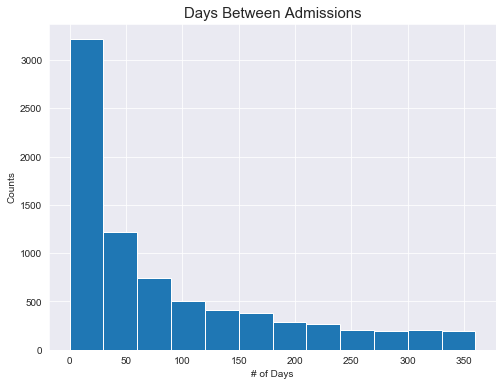

In [18]:
#Visualize the days between readmissions distribution 
df_adm.loc[~df_adm.DAYS_NEXT_ADMIT.isnull(),'DAYS_NEXT_ADMIT'].hist(figsize=(8,6), bins =range(0,365,30))
plt.title("Days Between Admissions", fontsize=15)
plt.xlabel('# of Days')
plt.ylabel('Counts')
plt.show();

Total Encounters with readmission: 11399
Total Encounters: 58976


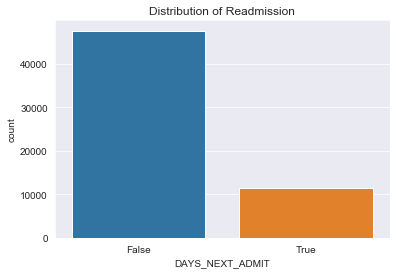

In [19]:
print('Total Encounters with readmission:', (~df_adm.DAYS_NEXT_ADMIT.isnull()).sum())
print('Total Encounters:', len(df_adm))
sns.countplot(~df_adm.DAYS_NEXT_ADMIT.isnull()).set_title('Distribution of Readmission');


The majority class is "without readmissions" and "with readmissions" is the minority class.

In [20]:
df_adm_explore = df_adm.copy(deep=True)
df_adm_explore['READMITTED'] = (df_adm.DAYS_NEXT_ADMIT < 30).astype('int')

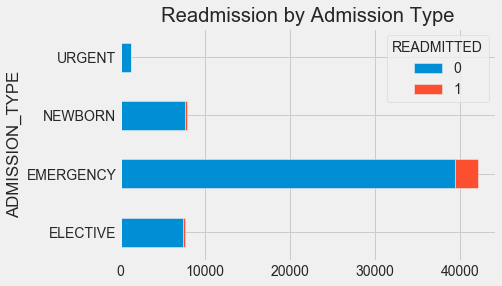

In [21]:

plt.style.use('fivethirtyeight')
df_admtyp = df_adm_explore.groupby(['READMITTED', 'ADMISSION_TYPE']).size().reset_index().pivot(columns='READMITTED', index='ADMISSION_TYPE', values=0)
df_admtyp.plot(kind='barh', stacked=True, figsize=(6, 4)).set_title('Readmission by Admission Type');

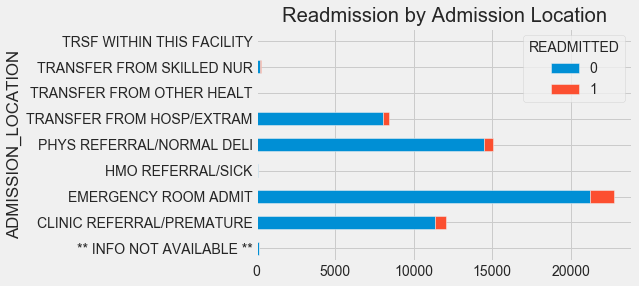

In [22]:

df_admtyp = df_adm_explore.groupby(['READMITTED', 'ADMISSION_LOCATION']).size().reset_index().pivot(columns='READMITTED', index='ADMISSION_LOCATION', values=0)
df_admtyp.plot(kind='barh', stacked=True, figsize=(6, 4)).set_title('Readmission by Admission Location');

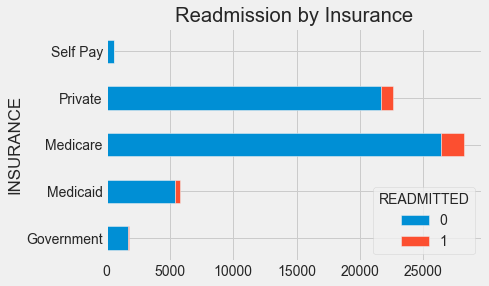

In [23]:

df_admtyp = df_adm_explore.groupby(['READMITTED', 'INSURANCE']).size().reset_index().pivot(columns='READMITTED', index='INSURANCE', values=0)
df_admtyp.plot(kind='barh', stacked=True, figsize=(6, 4)).set_title('Readmission by Insurance');



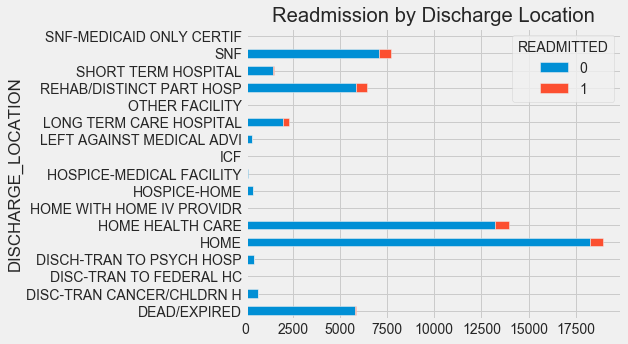

In [24]:

df_admtyp = df_adm_explore.groupby(['READMITTED', 'DISCHARGE_LOCATION']).size().reset_index().pivot(columns='READMITTED', index='DISCHARGE_LOCATION', values=0)
df_admtyp.plot(kind='barh', stacked=True, figsize=(6, 5)).set_title('Readmission by Discharge Location');


[<a href="#Data-Science-Capstone-Project">Jump back to Table of Contents</a>]  

# 1e. Load the Notes   


In [25]:
# Load the Notes
df_notes = pd.read_sql_query("""SELECT * FROM NOTEEVENTS;""", conn)
print("df_notes shape",df_notes.shape)
df_notes.info()


df_notes shape (2083180, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083180 entries, 0 to 2083179
Data columns (total 11 columns):
ROW_ID         int64
SUBJECT_ID     int64
HADM_ID        float64
CHARTDATE      object
CHARTTIME      object
STORETIME      object
CATEGORY       object
DESCRIPTION    object
CGID           float64
ISERROR        float64
TEXT           object
dtypes: float64(3), int64(2), object(6)
memory usage: 174.8+ MB


**Categories of Notes:** 
 Nursing/other        822497
Radiology            522279
Nursing              223556
ECG                  209051
Physician            141624
Discharge summary     59652
Echo                  45794
Respiratory           31739
Nutrition              9418
General                8301
Rehab Services         5431
Social Work            2670
Case Management         967
Pharmacy                103
Consult                  98
Name: CATEGORY, dtype: int64


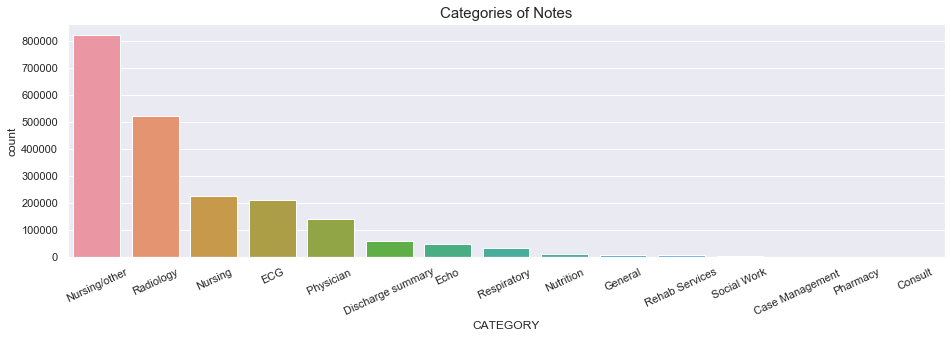

In [26]:
print('**Categories of Notes:**', '\n', df_notes.CATEGORY.value_counts())

sns.set(style='darkgrid')

plt.figure(figsize=(14, 4))
sns.countplot(x = 'CATEGORY',
              data = df_notes,
              order = df_notes['CATEGORY'].value_counts().index)
plt.title("Categories of Notes", fontsize=15)
plt.xticks(rotation = 25)
plt.show()

In [27]:
# ‘1’ in the ISERROR column indicates that a physician has identified this note as an error.
print('Number of notes where ISERROR= 1 is', df_notes.ISERROR.value_counts().sum())
print('Total Number of notes:', len(df_notes))
print('% Notes Marked in Error =' ,((df_notes.ISERROR.value_counts().sum()/len(df_notes))*100).round(decimals=2) )
df_notes.ISERROR.value_counts()

Number of notes where ISERROR= 1 is 886
Total Number of notes: 2083180
% Notes Marked in Error = 0.04


1.0    886
Name: ISERROR, dtype: int64

## Selecting the Note Type

The Joint Commission mandates all hospital discharge summaries must contain six high-level components, which are also noted as requirements in the National Quality Forum's Safe Practices for Better Healthcare.

The Advances in Patient Safety report referenced earlier shares these components and includes a consensus definition arrived at by two physicians and one geriatric nurse practitioner. for each. These are summarized as follows:

1. Reason for hospitalization:
    * description of the patient's primary presenting condition; and/or
    * description of a patient's initial presentation to the hospital admission, including description of the initial diagnostic evaluation.
2. Significant findings:
    * Primary diagnoses
3. Procedures and treatment provided:
    * description of the events occurring to a patient during the hospital stay; and/or
    * description of surgical, medical, other specialty, or allied health consults a patient experienced as an inpatient (or a note of "no consults"); and/or
    * description of surgical, invasive, noninvasive, diagnostic, or technical procedures a patient experienced as an inpatient (or note of "no procedures").
4. Patient's discharge condition:
    * Documentation that gives a sense for how the patient is doing at discharge or the patient's health status on discharge.
5. Patient and family instructions (as appropriate):
    * discharge medications; and/or
    * activity orders; and/or
    * therapy orders; and/or
    * dietary instructions; and/or
    * plans for medical follow-up.
6. Attending physician's signature:
    * A signature (electronic or physical) of the attending physician on the discharge summary.


While these six components can serve as a strong foundation for what the hospital should address in its discharge summary, consider whether it would be worthwhile to include other components that can help improve patient safety.

In [28]:
# Filter notes to discharge summary and not marked in error
nc = """SELECT * FROM df_notes WHERE CATEGORY = 'Discharge summary' AND ISERROR is null; """
df_dcnotes = pysqldf(nc)
print(df_dcnotes.shape)
df_dcnotes.head(1)

(59652, 11)


,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,None,None,Discharge summary,Report,None,None,Admission Date: [**2151-7-16**] Dischar...


In [29]:
#check the notes text for the first record
df_dcnotes.TEXT.iloc[0]


'Admission Date:  [**2151-7-16**]       Discharge Date:  [**2151-8-4**]\n\n\nService:\nADDENDUM:\n\nRADIOLOGIC STUDIES:  Radiologic studies also included a chest\nCT, which confirmed cavitary lesions in the left lung apex\nconsistent with infectious process/tuberculosis.  This also\nmoderate-sized left pleural effusion.\n\nHEAD CT:  Head CT showed no intracranial hemorrhage or mass\neffect, but old infarction consistent with past medical\nhistory.\n\nABDOMINAL CT:  Abdominal CT showed lesions of\nT10 and sacrum most likely secondary to osteoporosis. These can\nbe followed by repeat imaging as an outpatient.\n\n\n\n                            [**First Name8 (NamePattern2) **] [**First Name4 (NamePattern1) 1775**] [**Last Name (NamePattern1) **], M.D.  [**MD Number(1) 1776**]\n\nDictated By:[**Hospital 1807**]\nMEDQUIST36\n\nD:  [**2151-8-5**]  12:11\nT:  [**2151-8-5**]  12:21\nJOB#:  [**Job Number 1808**]\n'

In [30]:
#Check for multiple dc notes per admission
dup = """SELECT SUBJECT_ID,HADM_ID, count(HADM_ID) 
         FROM df_dcnotes GROUP BY SUBJECT_ID,HADM_ID 
         HAVING count(HADM_ID) >1 ORDER BY 3 DESC"""
pysqldf(dup).head()

,SUBJECT_ID,HADM_ID,count(HADM_ID)
0,20181,120654.0,7
1,25030,172599.0,7
2,634,145911.0,6
3,1817,166043.0,6
4,5278,126618.0,6


In [31]:
#verify
df_dcnotes.loc[df_dcnotes.SUBJECT_ID == 1817,['SUBJECT_ID','HADM_ID','CATEGORY','CHARTDATE','TEXT']]
               

,SUBJECT_ID,HADM_ID,CATEGORY,CHARTDATE,TEXT
27571,1817,166043.0,Discharge summary,2140-10-31,Admission Date: [**2140-10-20**] ...
27572,1817,166043.0,Discharge summary,2140-10-31,Admission Date: [**2140-10-20**] ...
27573,1817,166043.0,Discharge summary,2140-10-31,Admission Date: [**2140-10-20**] ...
27574,1817,166043.0,Discharge summary,2140-10-31,Admission Date: [**2140-10-20**] ...
27575,1817,166043.0,Discharge summary,2140-10-31,Admission Date: [**2140-10-20**] ...
57125,1817,166043.0,Discharge summary,2140-11-01,"Name: [**Known lastname 11258**],[**Known fir..."


In [32]:
df_dcnotes_last = (df_dcnotes.groupby(['SUBJECT_ID','HADM_ID']).nth(-1)).reset_index()
print(df_dcnotes_last.shape)
#verify
df_dcnotes_last.loc[df_dcnotes_last.SUBJECT_ID == 1817,['SUBJECT_ID','HADM_ID','CATEGORY','CHARTDATE','TEXT']]

(52726, 11)


,SUBJECT_ID,HADM_ID,CATEGORY,CHARTDATE,TEXT
1904,1817,166043.0,Discharge summary,2140-11-01,"Name: [**Known lastname 11258**],[**Known fir..."


# 1f. Merge the Data 

[<a href="#Data-Science-Capstone-Project">Jump back to Table of Contents</a>]  

In [33]:
# Merge Admissions and Notes and remove the encounters with deceased state
adm_notes = """SELECT a.SUBJECT_ID, a.HADM_ID, a.ADMITTIME, a.DISCHTIME, a.DAYS_NEXT_ADMIT, a.NEXT_ADM_DATE, 
a.ADMISSION_TYPE, a.DEATHTIME, TEXT
FROM df_adm a LEFT JOIN df_dcnotes_last n ON a.SUBJECT_ID = n.SUBJECT_ID  AND a.HADM_ID = n.HADM_ID
WHERE DEATHTIME IS NULL;"""
df_adm_notes = pysqldf(adm_notes)
print(df_adm_notes.shape)


(53122, 9)


In [34]:

#Let's summarize
print('How many rows are in the merged data?' ,len(df_adm_notes.TEXT))
print('How many columns are in this dataset?', len(df_adm_notes.columns))
print('How many notes have null values?',df_adm_notes.TEXT.isna().sum().sum())
print('What is the percentage of null values?', round((df_adm_notes.TEXT.isna().sum().sum()/df_adm_notes.TEXT.size) *100,2),"%")

How many rows are in the merged data? 53122
How many columns are in this dataset? 9
How many notes have null values? 5659
What is the percentage of null values? 10.65 %


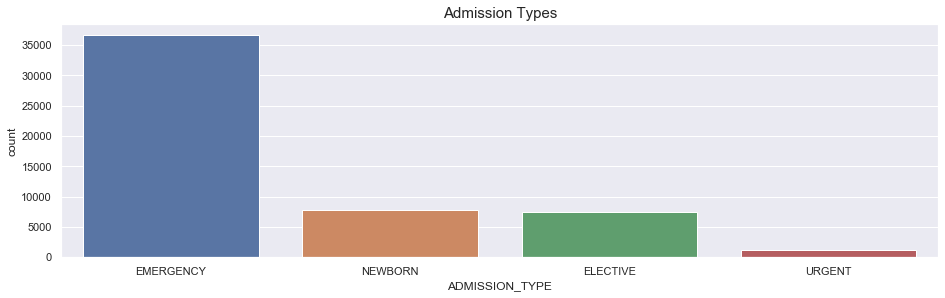

In [35]:
df_adm_notes.groupby('ADMISSION_TYPE').apply(lambda g: g.TEXT.isnull().sum())/df_adm_notes.groupby('ADMISSION_TYPE').size()
plt.figure(figsize=(14, 4))
sns.countplot(x = 'ADMISSION_TYPE',
              data = df_adm_notes,
              order = df_adm_notes['ADMISSION_TYPE'].value_counts().index)
plt.title("Admission Types", fontsize=15)
plt.show()

In [36]:
#Remove the Newborn encounters
df_adm_notes_clean = df_adm_notes.loc[df_adm_notes.ADMISSION_TYPE != 'NEWBORN'].copy()

In [37]:
print('How many rows are in the merged data?' ,len(df_adm_notes_clean.TEXT))
print('How many columns are in this dataset?', len(df_adm_notes_clean.columns))
print('How many notes have null values?',df_adm_notes_clean.TEXT.isna().sum().sum())
print('What is the percentage of null values?', round((df_adm_notes_clean.TEXT.isna().sum().sum()/df_adm_notes_clean.TEXT.size) *100,2),"%")

How many rows are in the merged data? 45321
How many columns are in this dataset? 9
How many notes have null values? 1441
What is the percentage of null values? 3.18 %


[<a href="#Data-Science-Capstone-Project">Jump back to Table of Contents</a>]  

# 1g. Create the Target Variable

Relative Frequencies of Readmissions 
 0    0.93
1    0.07
Name: READMITTED, dtype: float64
Number of positive samples: 2963
Number of negative samples: 42358
Total samples: 45321


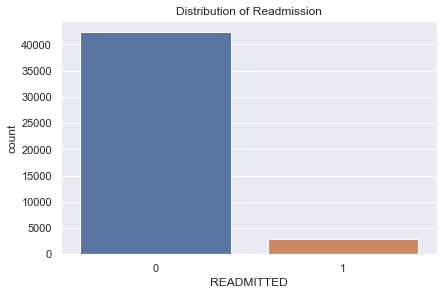

In [38]:
# Create a new column for the target/dependent variable i.e readmitted within 30 days
df_adm_notes_clean['READMITTED'] = (df_adm_notes_clean.DAYS_NEXT_ADMIT < 30).astype('int')
print('Relative Frequencies of Readmissions','\n' , np.round(df_adm_notes_clean['READMITTED'].value_counts(normalize=True), decimals=2))

print('Number of positive samples:', (df_adm_notes_clean.READMITTED == 1).sum())
print('Number of negative samples:',  (df_adm_notes_clean.READMITTED == 0).sum())
print('Total samples:', len(df_adm_notes_clean))
sns.countplot(df_adm_notes_clean['READMITTED']).set_title('Distribution of Readmission');


# 1h. Save the Preprocessed Data

In [39]:
#Save the pre-processed data
datafinal = df_adm_notes_clean.copy(deep=True)
datafinal.to_csv('final_data.csv', index=False)

[<a href="#Data-Science-Capstone-Project">Jump back to Table of Contents</a>]  